### 使用Python工具自動進行迴歸函式尋找

#### 問題一(簡單線性迴歸)

Manufacturing
0.35245604396340297
y=1.7102x_0+0.9839x_1

MetalMachinery_Electrical
70.0198201635785
y=-20.1785x_0+1.1130x_1

Information_Electronic
23.571850585185352
y=29.8889x_0+0.6923x_1

Chemical
74.53408301956402
y=-21.3826x_0+1.1438x_1

Consumer_Goods
431.79305262931933
y=126.3862x_0+-0.6044x_1

Electricity_GasSupply
87.17789781652846
y=-5.4322x_0+0.9593x_1

Water_Supply
182.06039042098757
y=-31.9500x_0+1.1204x_1



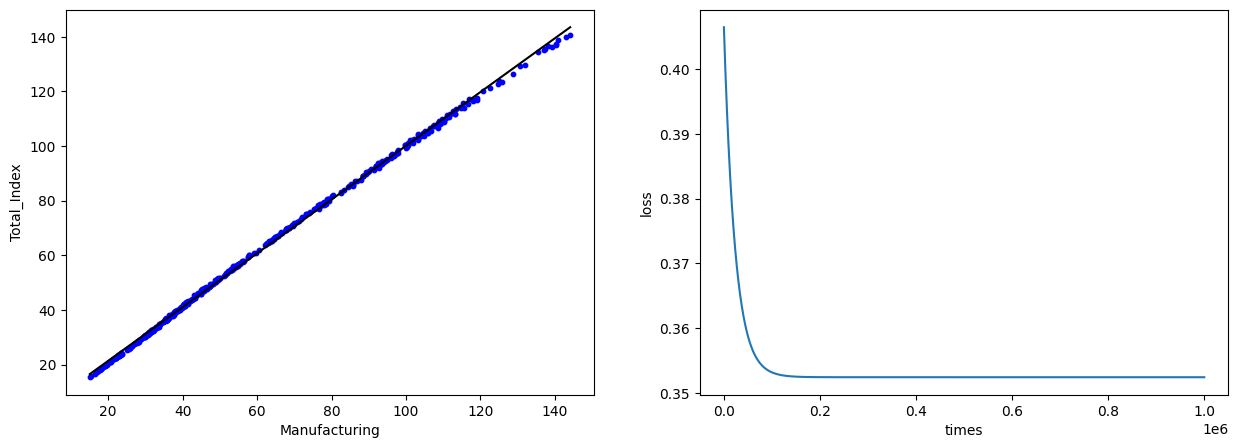

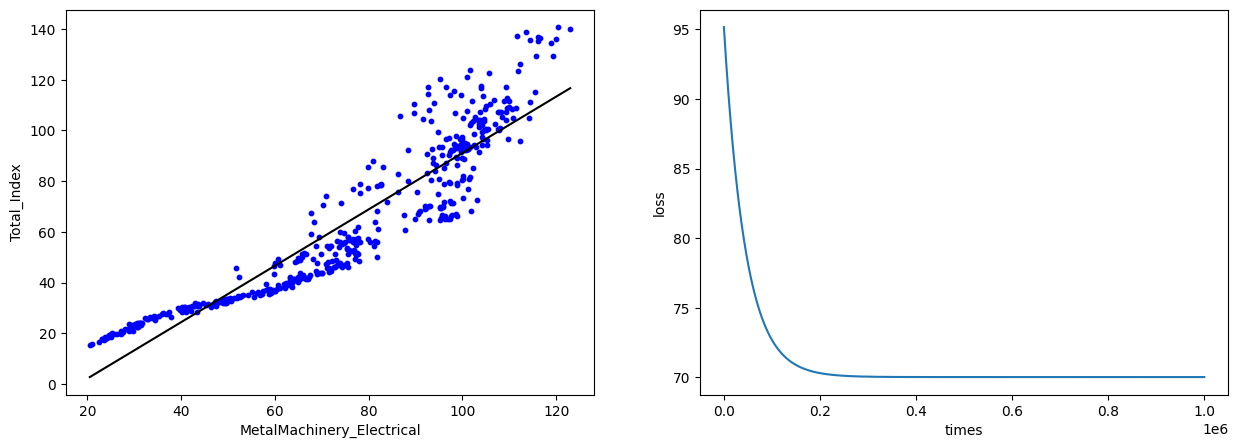

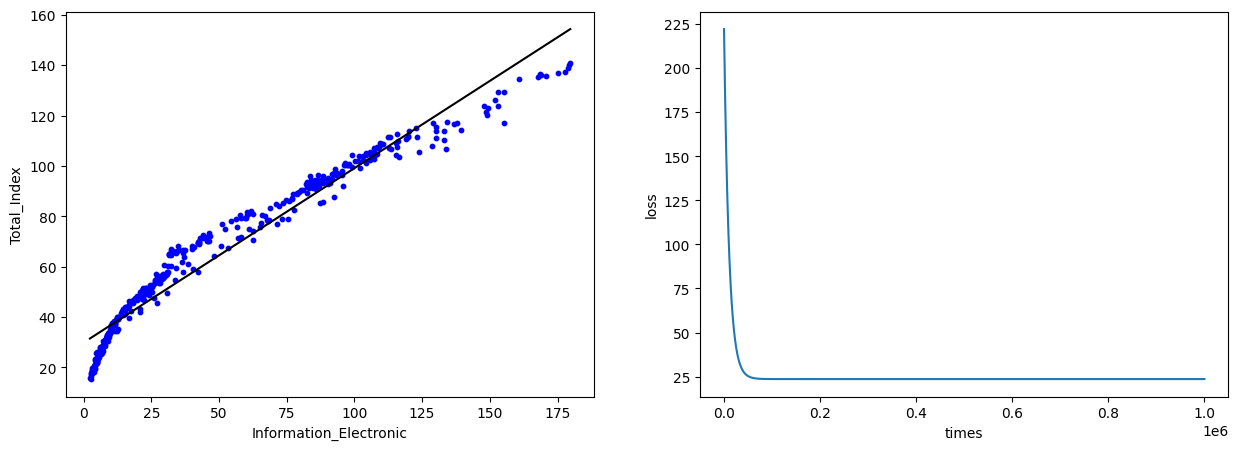

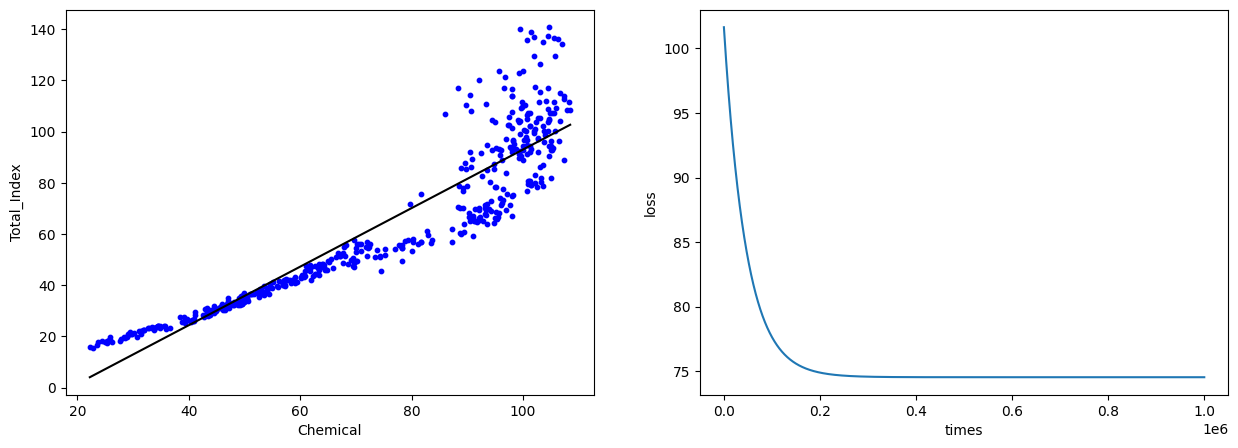

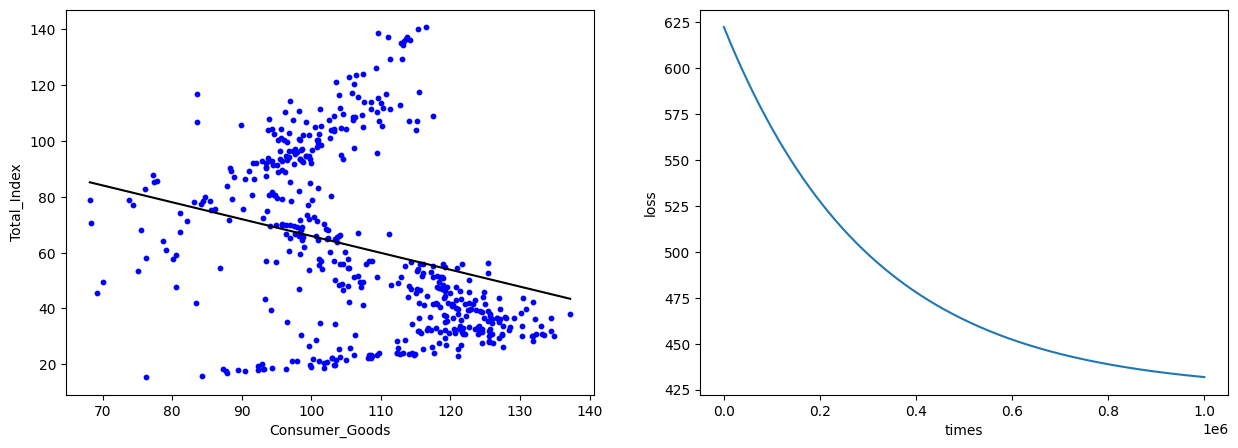

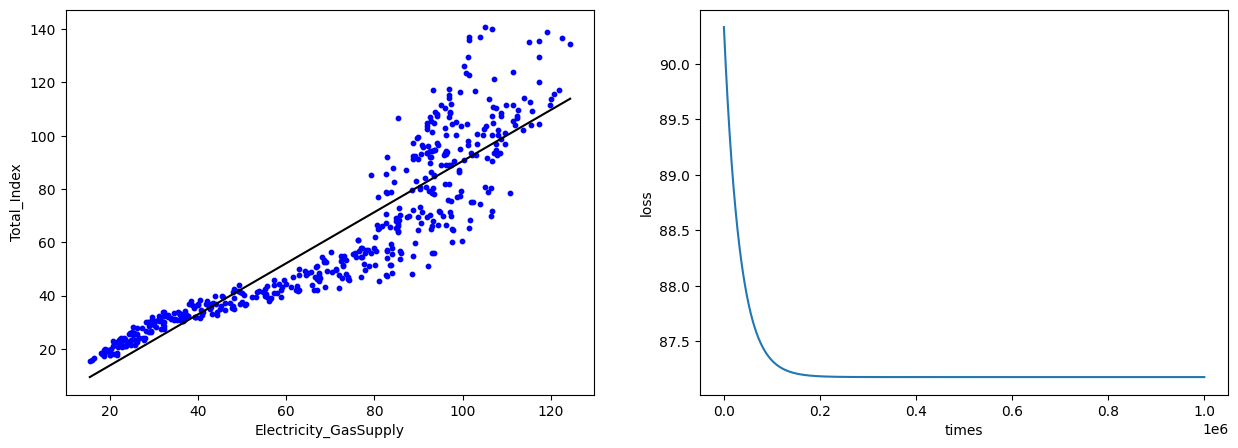

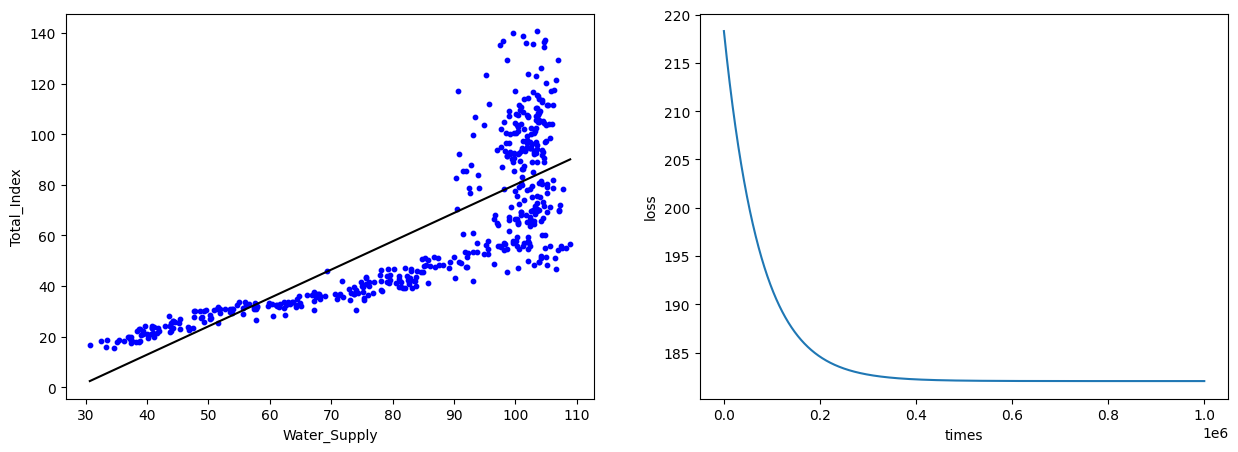

In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#預測函式
def pred(x, w):
    return np.matmul(x, w)

#讀取檔案
data = pd.read_csv('industry.csv')

#CSV的每項工業指數和總指數跑迴歸模型
for i in data:
    if i != "Total_Index" and i !=" ": 
        x_data = np.array(data[[i]])
        yt = np.array(data[['Total_Index']])
        x = np.insert(x_data, 0, 1.0, axis=1)
        
        #取得x的行數(0)與列數(1)
        M = x.shape[0] 
        D = x.shape[1]
        
        #設定迭代次數、學習率
        iters = 1000000
        alpha = 0.0001
        
        #設定初始權重和紀錄存儲
        w = np.ones(D)  
        history = np.zeros((0, 2))  #第一個維度=0,第二個維度=2(有兩組數據:迭代次數、損失函數)
        for k in range(iters):
            #迭代運算，求得損失函式的低谷
            yp = pred(x, w)
            yd = yp - yt[:, 0]
            #梯度下降(權重計算)
            w = w - alpha * (x.T @ yd) / M
            if k % 10 == 0:
                # 損失值
                loss = np.mean(yd ** 2) / 2
                history = np.vstack((history, np.array([k, loss])))
       
        #印出損失值和迴歸函式
        print(i)
        print(loss)        
        print("y={:.4f}x_0+{:.4f}x_1\n".format(w[0],w[1]))        
        
        #劃出資料分布圖迴歸線、學習曲線
        fig_1,((ax1,ax2)) = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
        xall = x[:, 1].ravel()
        x1 = np.array([[1, xall.min()], [1, xall.max()]])
        y1 = pred(x1, w)
        ax1.scatter(x[:, 1], yt, s=10, c='b')
        ax1.set(xlabel = i , ylabel = "Total_Index")
        ax1.plot(x1[:, 1], y1, c="k")
        ax2.plot(history[1:,0], history[1:,1])
        ax2.set(xlabel = "times" , ylabel = "loss")


#### 問題一(多元線性迴歸)

loss: 0.09168014340147715
y=0.9902x_0+0.2546x_1+0.1523x_2+0.3347x_3+0.1584x_4+0.0307x_5+0.0637x_6+-0.0081x_7


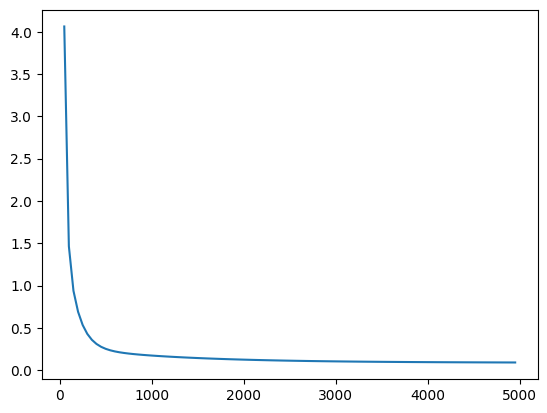

In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

def pred(x, w):
    return np.matmul(x, w)

data = pd.read_csv('industry.csv')

#將每項工業作為特徵值
x_data = np.array(data[['Manufacturing','MetalMachinery_Electrical','Information_Electronic','Chemical','Consumer_Goods','Electricity_GasSupply', 'Water_Supply']])
yt = np.array(data[['Total_Index']])
x = np.insert(x_data, 0, 1.0, axis=1)
M = x.shape[0]
D = x.shape[1]
iters = 5000
alpha = 0.00001
w = np.ones(D)
history = np.zeros((0, 2))
for k in range(iters):
    yp = pred(x, w)
    yd = yp - yt[:, 0]
    w = w - alpha * (x.T @ yd) / M
    loss = np.mean(yd ** 2) / 2
    if k % 50 ==0:
        loss = np.mean(yd ** 2) / 2
        history = np.vstack((history, np.array([k, loss])))
    
print("loss:",loss)    
print("y={:.4f}x_0+{:.4f}x_1+{:.4f}x_2+{:.4f}x_3+{:.4f}x_4+{:.4f}x_5+{:.4f}x_6+{:.4f}x_7".format(w[0],w[1],w[2],w[3],w[4],w[5],w[6],w[7])) 

plt.plot(history[1:,0], history[1:,1])
plt.show()

#### 問題二

Total_Index
78.67126505964337
y=1.2871x_0+1.2325x_1+-0.3167x_2

Manufacturing
90.14012772770148
y=1.3038x_0+1.2635x_1+-0.3518x_2

MetalMachinery_Electrical
35.55394172236199
y=1.1046x_0+0.5863x_1+0.3731x_2

Information_Electronic
254.94400538957612
y=1.2644x_0+2.1804x_1+-1.2966x_2

Chemical
25.039277730886237
y=1.1399x_0+0.5878x_1+0.3594x_2

Consumer_Goods
312.9261363976913
y=3.2077x_0+-1.7376x_1+2.6428x_2



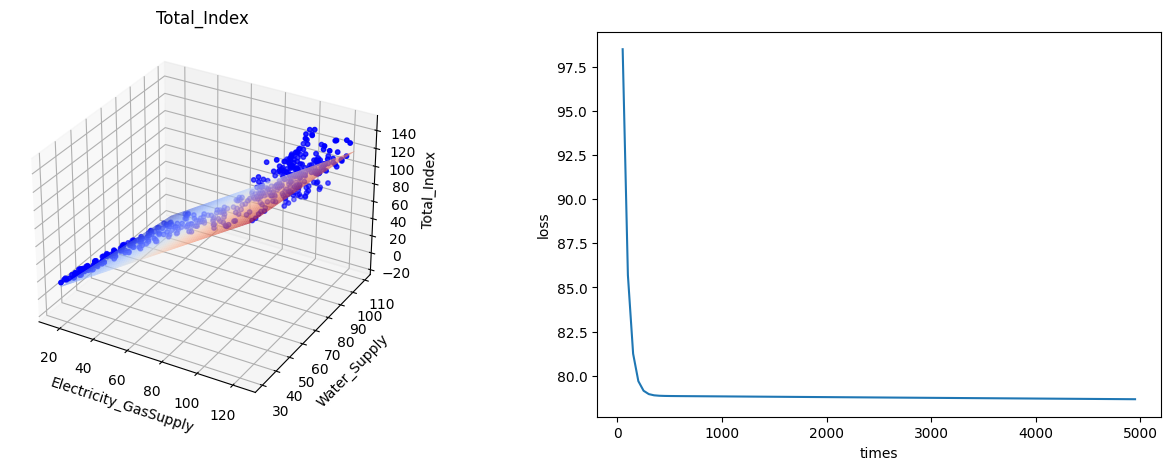

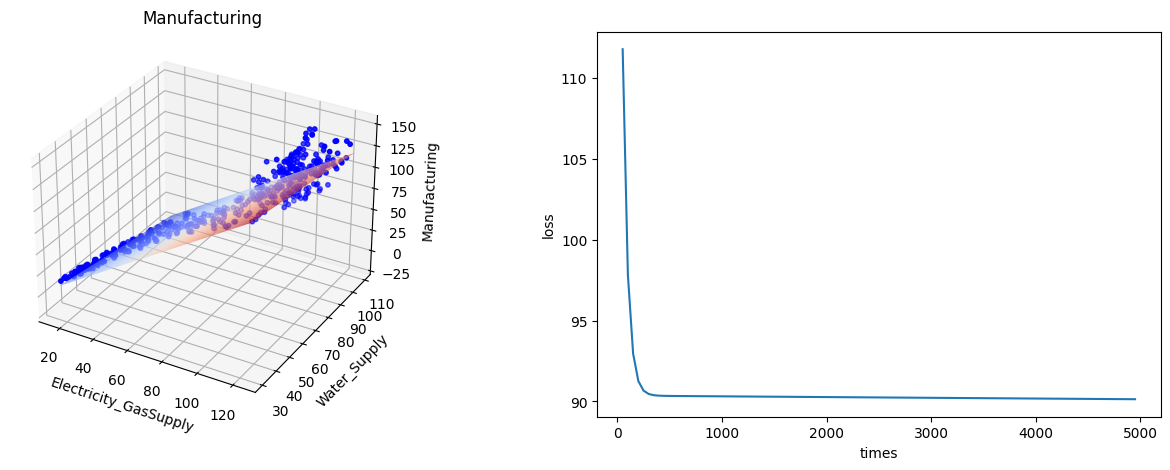

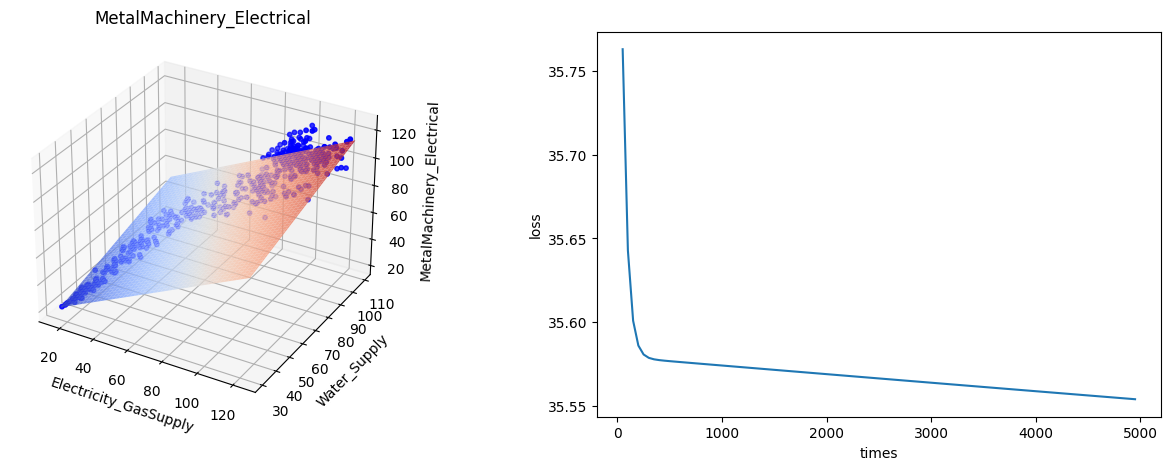

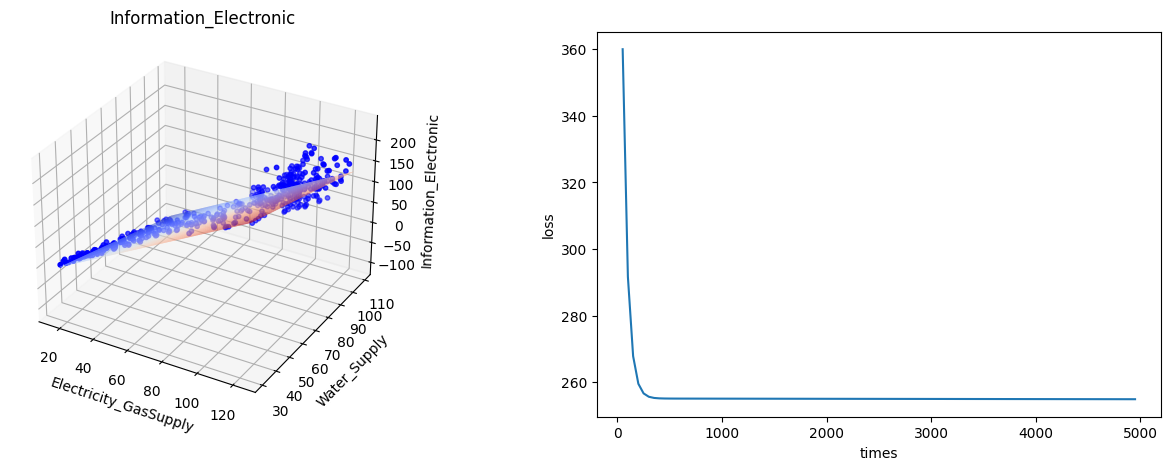

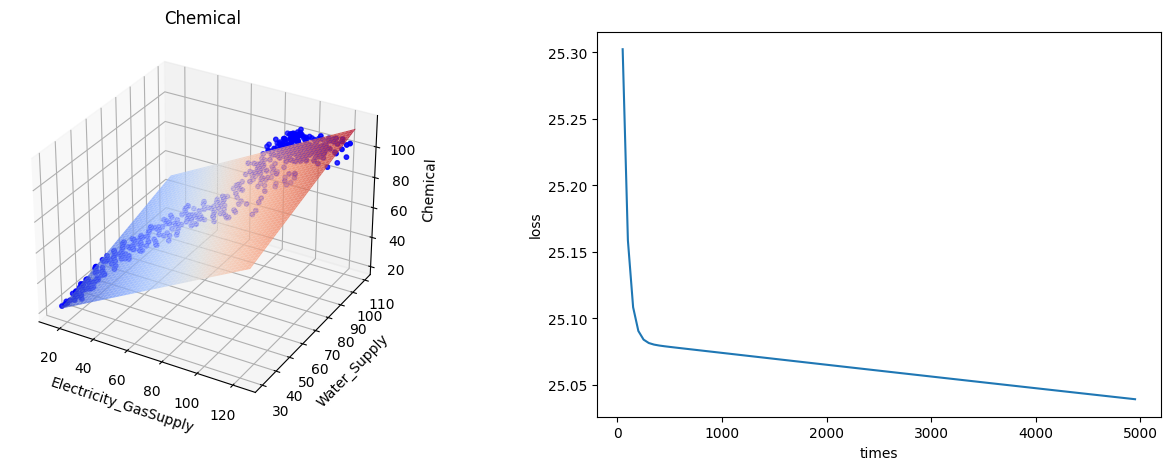

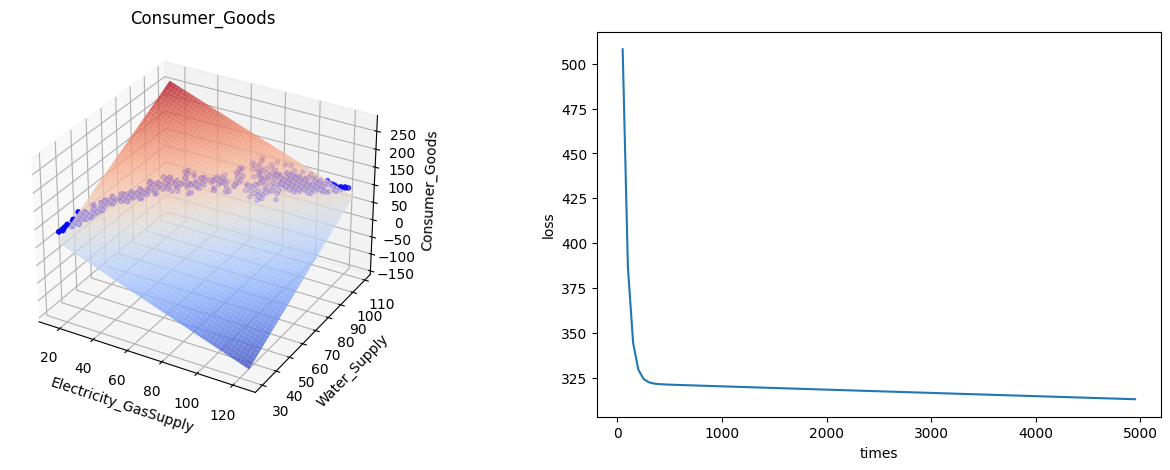

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def pred(x, w):
    return np.matmul(x, w)

data = pd.read_csv('industry.csv')

x_data = np.array(data[['Electricity_GasSupply', 'Water_Supply']])
for i in data:
    if i != " " and i != "Electricity_GasSupply" and i !="Water_Supply":
        yt = np.array(data[[i]])
        x = np.insert(x_data, 0, 1.0, axis=1)
        M = x.shape[0]
        D = x.shape[1]
        iters = 5000
        alpha = 0.0001
        w = np.ones(D)
        history = np.zeros((0, 2))
        for k in range(iters):
            yp = pred(x, w)
            yd = yp - yt[:, 0]
            w = w - alpha * (x.T @ yd) / M
            if k % 50 ==0:
                loss = np.mean(yd ** 2) / 2
                history = np.vstack((history, np.array([k, loss])))
        
        print(i)
        print(loss)
        print("y={:.4f}x_0+{:.4f}x_1+{:.4f}x_2\n".format(w[0],w[1],w[2]))      
        
        #設定三維的資料分布及迴歸平面圖
        x1, x2 = np.meshgrid(np.linspace(x[:,1].min(), x[:,1].max(), 100), 
                            np.linspace(x[:,2].min(), x[:,2].max(), 100))
        x_all = np.column_stack((np.ones(x1.size), x1.ravel(), x2.ravel()))
        y1 = pred(x_all, w)
        y1 = y1.reshape(x1.shape)
        fig = plt.figure(figsize=(16, 5))
        
        ax1 = fig.add_subplot(121, projection='3d') 
        ax1.scatter(x[:,1], x[:,2], yt, s=10, c='b')
        ax1.set_xlabel('Electricity_GasSupply')
        ax1.set_ylabel('Water_Supply')
        ax1.set_zlabel(i)
        ax1.set_title(i)
        #設定回歸平面(這裡的alpha是透明度)
        ax1.plot_surface(x1, x2, y1, cmap='coolwarm', alpha=0.8)
        
        ax2= fig.add_subplot(122)
        ax2.plot(history[1:,0], history[1:,1])
        ax2.set(xlabel="times",ylabel="loss")

### 測試資料對找到的迴歸函式進行測試

#### 問題一(簡單線性迴歸)

In [12]:
import numpy as np 
import pandas as pd     

testdata = pd.read_csv('TD.csv')

#將各項工業建立成清單
xlab = []
for i in testdata:
    if i != "Total_Index" and i !=" ":
        xlab.append(i)
        
#將各測資輸入對應的預測函式，得出預測值      
yp = []
for i in range(7):
    x_data = np.array(testdata[[xlab[i]]])
    y_col = []
    for j in x_data:
        x1 = int(j)
        y = [1.7102+0.9839*x1, -20.1785+1.1130*x1, 29.8889+0.6923*x1, 
          -21.3826+1.1438*x1, 126.3862-0.6044*x1, -5.4322+0.9593*x1,
          -31.9500+1.1204*x1]
        #儲存預測出的資料
        y_col.append(round(y[i],2))
    yp.append(y_col)

#輸出成csv檔(output1.csv)
np.savetxt("output1.csv", np.array(yp).T, delimiter=",", fmt='%.2f')

#在output1.csv加上原始的總指數資料
df = pd.read_csv('output1.csv', header=None)
init = testdata["Total_Index"].tolist()
df.insert(loc=0, column='', value=init)

#在output1.csv加上表頭
header = ['raw_data'] + xlab
df.columns = header

#將csv修改結果輸出
df.to_csv('output1.csv', index=False)

#顯示前10行
df.head(10)

,raw_data,Manufacturing,MetalMachinery_Electrical,Information_Electronic,Chemical,Consumer_Goods,Electricity_GasSupply,Water_Supply
0,131.57,132.57,101.14,146.89,93.00,66.55,96.25,75.61
1,134.96,136.50,103.36,148.27,99.86,65.34,102.97,80.09
2,136.01,136.50,102.25,151.04,95.28,65.34,108.72,80.09
3,136.76,136.50,100.03,153.12,89.57,60.51,117.36,90.17
4,140.81,141.42,97.80,162.12,86.13,58.09,112.56,90.17
5,132.34,133.55,92.23,153.12,80.42,64.13,102.97,85.69
6,129.71,130.60,91.12,150.35,80.42,64.74,100.09,85.69
7,129.49,130.60,94.46,150.35,74.70,62.32,93.38,78.97
8,129.49,130.60,94.46,148.27,80.42,61.11,92.42,86.81
9,108.41,108.96,69.97,128.89,70.12,75.62,84.74,84.57


#### 問題一(多元線性迴歸)

In [13]:
import numpy as np 
import pandas as pd     

testdata = pd.read_csv('TD.csv')

#定義預測函式
def fun(x1,x2,x3,x4,x5,x6,x7):
    return 0.9902+0.2546*x1+0.1523*x2+0.3347*x3+0.1584*x4+0.0307*x5+0.0637*x6-0.0081*x7

yp = []
for i in range(10):
    rd = testdata.iloc[i].values  #讀取指定的row，並將row的資料轉成矩陣
    x1,x2,x3,x4,x5,x6,x7 = rd[2], rd[3], rd[4], rd[5], rd[6], rd[7], rd[8]
    yp.append(fun(x1,x2,x3,x4,x5,x6,x7))
    
np.savetxt("output2.csv", np.array(yp).T, delimiter=",", fmt='%.2f')
df = pd.read_csv('output2.csv', header=None)

init = testdata["Total_Index"].tolist()
df.insert(loc=0, column='', value=init)

header = ['raw_data','predict']
df.columns = header

df.to_csv('output2.csv', index=False)

df.head(10)

,raw_data,predict
0,131.57,133.41
1,134.96,136.75
2,136.01,137.95
3,136.76,138.29
4,140.81,142.79
5,132.34,134.30
6,129.71,131.57
7,129.49,131.19
8,129.49,130.93
9,108.41,109.93


#### 問題二
###### 迴歸模型的預測數據

In [14]:
import numpy as np 
import pandas as pd     

testdata = pd.read_csv('TD.csv')

#將各項工業建立成清單
xlab = []
for i in testdata:
    if i != " " and i != "Electricity_GasSupply" and i !="Water_Supply":
        xlab.append(i)
        
#將各測資入對應的預測函式      
yp = []
for i in range(6):
    xEG = np.array(testdata[['Electricity_GasSupply']])
    xWS = np.array(testdata[['Water_Supply']])
    y_col = []
    for j in range(10):
        x1 = int(xEG[j])
        x2 = int(xWS[j])
        y = [1.2871+1.2325*x1-0.3167*x2, 1.3038+1.2635*x1-0.3518*x2,
             1.1046+0.5863*x1+0.3731*x2, 1.2644+2.1804*x1-1.2966*x2,
             1.1399+0.5878*x1+0.3594*x2, 3.2077-1.7376*x1+2.6428*x2]
        y_col.append(round(y[i],2))
    yp.append(y_col)

#輸出成csv檔(output1.csv)
np.savetxt("output3.csv", np.array(yp).T, delimiter=",", fmt='%.2f')

#在output1.csv加上原始的總指數資料
df = pd.read_csv('output3.csv', header=None)

#在output1.csv加上表頭
header = xlab
df.columns = header

#將csv修改結果輸出
df.to_csv('output3.csv', index=False)

#顯示前10行
df.head(10)

,Total_Index,Manufacturing,MetalMachinery_Electrical,Information_Electronic,Chemical,Consumer_Goods
0,101.53,101.46,99.07,107.91,97.95,72.73
1,108.89,108.90,104.67,117.99,103.50,71.14
2,116.28,116.48,108.18,131.07,107.03,60.71
3,124.53,124.69,116.82,139.03,115.55,68.86
4,118.36,118.37,113.89,128.12,112.61,77.55
5,107.31,107.14,106.53,111.51,105.30,84.35
6,103.61,103.35,104.77,104.97,103.53,89.57
7,96.88,96.62,98.43,97.48,97.26,85.87
8,93.43,92.89,100.46,86.23,99.19,106.11
9,84.21,83.49,95.02,71.38,93.77,114.72


###### 原始的資料數據

In [15]:
testdata = pd.read_csv('TD.csv')

#資料範圍選取
a = testdata.loc[:,'Total_Index':'Consumer_Goods']
a.head(10)

,Total_Index,Manufacturing,MetalMachinery_Electrical,Information_Electronic,Chemical,Consumer_Goods
0,131.57,133.98,109.69,169.22,100.59,99.48
1,134.96,137.03,111.49,171.67,106.56,101.52
2,136.01,137.75,110.65,175.78,102.91,101.23
3,136.76,137.84,108.01,178.31,97.54,109.01
4,140.81,142.57,106.22,191.04,94.17,113.10
5,132.34,134.18,101.85,178.90,89.63,103.69
6,129.71,131.59,100.68,174.01,89.57,102.03
7,129.49,131.89,103.39,174.49,84.52,106.83
8,129.49,131.89,103.08,171.79,89.25,108.59
9,108.41,109.72,81.97,143.18,80.99,84.94
